In [25]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("max_columns", 100)
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
from collections import Counter

In [14]:
combined = pd.read_csv("data/combined1.csv")

In [15]:
oversample = SMOTE()
y = combined['callback']
X = combined.drop(['callback'], axis=1)
X, y = oversample.fit_resample(X,y)

In [16]:
counter = Counter(y)
for k, v in counter.items():
    dist = v / len(y) * 100
    print(f"Class = {k}, n ={v} ({dist}%)")

Class = 0.0, n =11612 (50.0%)
Class = 1.0, n =11612 (50.0%)


## Preprocessing Data - Combined Data ##

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
skfold = StratifiedKFold(n_splits=5, shuffle=True)

## Testing - Random Forest (Grid Search) ##

In [18]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

In [19]:
CV_rfc = GridSearchCV(estimator=rforest, param_grid=param_grid, cv= skfold)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [20]:
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()

In [21]:
print("Best Parameter: {}".format(CV_rfc.best_params_))

Best Parameter: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 500}


In [22]:
rforest_grid =  RandomForestClassifier(n_estimators=500, max_features = 'sqrt', criterion= 'entropy')
rforest_grid.fit(X_train,y_train)
ypred = rforest_grid.predict(X_test)

In [23]:
print("RANDOM FORESST (SCALED DATA) Grid Search")
print("Training set score: {:.2f}".format(rforest_grid.score(X_train, y_train)))
print("Test set score: {:.2f}".format(rforest_grid.score(X_test, y_test)))

print("Mean Cross Validation, SKFold: {:.2f}".format(np.mean(cross_val_score(rforest_grid, 
                                                                             X_train, 
                                                                             y_train, 
                                                                             cv=skfold,
                                                                            scoring = 'accuracy'))))

rforest_feature = pd.DataFrame(data=rforest_grid.feature_importances_).T
rforest_feature.columns = X.columns
rforest_feature.index=['Random Forest Features']

RANDOM FORESST (SCALED DATA) Grid Search
Training set score: 0.85
Test set score: 0.83
Mean Cross Validation, SKFold: 0.82


In [26]:
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      2851
         1.0       0.84      0.82      0.83      2955

    accuracy                           0.83      5806
   macro avg       0.83      0.83      0.83      5806
weighted avg       0.83      0.83      0.83      5806



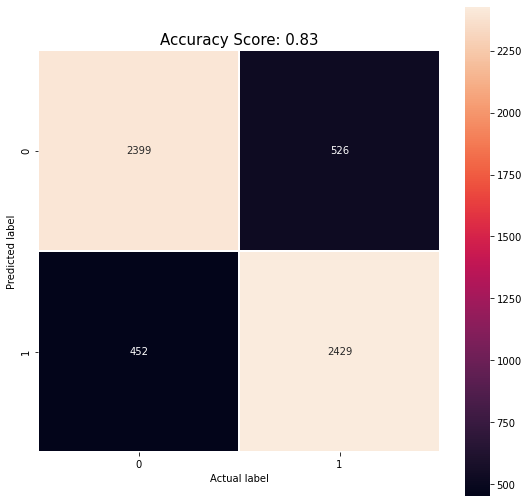

In [27]:
rf_mat = metrics.confusion_matrix(y_test, ypred)
plt.figure(figsize=(9,9))
score = (rforest_grid.score(X_test, y_test))
sns.heatmap(rf_mat, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score, 2))
plt.title(all_sample_title, size = 15);

In [28]:
from sklearn.metrics import accuracy_score

print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,ypred))

Accuracy for Random Forest on CV data:  0.8315535652772994


In [29]:
print(combined.columns)
combined['montreal'].value_counts()

Index(['language_skills', 'accreditation', 'reference', 'female', 'callback',
       'skillspeaking', 'skillsocialper', 'east_asian', 'south_asian', 'anglo',
       'vancouver', 'toronto', 'montreal'],
      dtype='object')


0    10609
1     2284
Name: montreal, dtype: int64

In [76]:
X_check = np.array([[1, 1, 1, 0, 75, 80, 0, 0, 0, 0, 0, 0]])
X_check= X_check.astype(float)

In [77]:
y_check = rforest_grid.predict(X_check)
print(y_check)
# Confidence
y_pred_prob = rforest_grid.predict_proba(X_check)
print(y_pred_prob)

[0.]
[[0.59646667 0.40353333]]


In [47]:
np.set_printoptions(threshold=np.inf)
print(X_test.astype(int))

[[ 0  0  0  0 75 72  1  0  0  0  0  0]
 [ 1  0  0  1 59 62  0  0  1  1  0  0]
 [ 1  0  0  0 70 50  0  0  1  1  0  0]
 [ 1  0  0  1 74 60  0  0  1  1  0  0]
 [ 0  0  0  1 70 50  1  0  0  0  0  1]
 [ 0  0  0  0 57 46  0  0  1  0  0  0]
 [ 1  0  0  0 70 50  1  0  0  0  0  1]
 [ 0  0  0  0 59 62  0  1  0  1  0  0]
 [ 1  0  0  1 80 67  0  0  0  0  1  0]
 [ 0  0  0  1 79 69  0  1  0  1  0  0]
 [ 0  0  0  1 72 63  1  0  0  0  1  0]
 [ 0  0  0  1 68 64  0  1  0  1  0  0]
 [ 1  0  0  0 70 41  0  0  0  0  0  0]
 [ 0  0  0  1 70 50  1  0  0  1  0  0]
 [ 0  0  0  0 59 62  0  0  1  0  1  0]
 [ 1  0  0  1 80 75  0  0  0  0  0  1]
 [ 1  0  0  0 65 51  0  1  0  1  0  0]
 [ 0  0  0  0 75 72  0  0  1  1  0  0]
 [ 0  0  0  1 70 56  0  1  0  0  1  0]
 [ 0  0  0  1 59 62  0  1  0  1  0  0]
 [ 1  0  0  1 59 62  0  1  0  1  0  0]
 [ 0  0  0  1 54 50  1  0  0  1  0  0]
 [ 0  0  0  0 80 67  1  0  0  0  1  0]
 [ 0  0  0  1 65 62  0  1  0  0  0  1]
 [ 0  0  0  0 64 53  0  0  1  0  1  0]
 [ 0  0  0  0 79 64  1  0

In [33]:
y_test

14381    1.0
12819    0.0
11434    1.0
10930    0.0
21867    1.0
        ... 
12422    0.0
21317    1.0
23021    1.0
16523    1.0
18613    1.0
Name: callback, Length: 5806, dtype: float64